In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
bank = pd.read_csv("C:\Aalesh and Mandar\Datasets\Cases\Bankruptcy\Bankruptcy.csv", index_col = 0)

In [3]:
bank.head()

,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
NO,,,,,,,,,,,,,,,,,,,,,
1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [4]:
x = bank.drop(["D","YR"], axis=1)
y=bank["D"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 2022, train_size = 0.7)

## Gradient Boost

In [6]:
gb = GradientBoostingClassifier(random_state = 2022)
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
y_pred_prob = gb.predict_proba(x_test)[:,1]

In [7]:
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

0.825
0.8825


In [10]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
params = {"n_estimators":[50,100,150],
          "max_depth":[1,2,3,4],
          "learning_rate":[0.01,0.15,0.2,0.3]}
gcv = GridSearchCV(gb, param_grid = params, verbose = 3, scoring = "roc_auc", cv = kfold)
gcv.fit(x, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.819 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.879 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.840 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.976 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.938 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.868 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.926 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.864 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.994 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.959 to

[CV 3/5] END learning_rate=0.15, max_depth=2, n_estimators=150;, score=0.734 total time=   0.1s
[CV 4/5] END learning_rate=0.15, max_depth=2, n_estimators=150;, score=0.959 total time=   0.1s
[CV 5/5] END learning_rate=0.15, max_depth=2, n_estimators=150;, score=0.923 total time=   0.1s
[CV 1/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.835 total time=   0.0s
[CV 2/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.918 total time=   0.0s
[CV 3/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.796 total time=   0.0s
[CV 4/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.988 total time=   0.0s
[CV 5/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.964 total time=   0.0s
[CV 1/5] END learning_rate=0.15, max_depth=3, n_estimators=100;, score=0.835 total time=   0.1s
[CV 2/5] END learning_rate=0.15, max_depth=3, n_estimators=100;, score=0.923 total time=   0.1s
[CV 3/5] END learning_rate=0.15, max_depth=3,

[CV 1/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.819 total time=   0.1s
[CV 2/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.907 total time=   0.2s
[CV 3/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.731 total time=   0.2s
[CV 4/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.976 total time=   0.2s
[CV 5/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.988 total time=   0.2s
[CV 1/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.896 total time=   0.0s
[CV 2/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.901 total time=   0.0s
[CV 3/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.787 total time=   0.0s
[CV 4/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.964 total time=   0.0s
[CV 5/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.988 total time=   0.0s
[CV 1/5] END learning_rate=0.3, max_depth=1, n_estimato

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=2022),
             param_grid={'learning_rate': [0.01, 0.15, 0.2, 0.3],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=3)

In [11]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 150}
0.9261622992392222


In [12]:
best_model = gcv.best_estimator_
best_model

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=150,
                           random_state=2022)

In [13]:
imp_features = best_model.feature_importances_
imp_features

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.32126626, 0.        ,
       0.        , 0.        , 0.        , 0.01708337, 0.23490413,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10589963, 0.        , 0.        , 0.32084662])

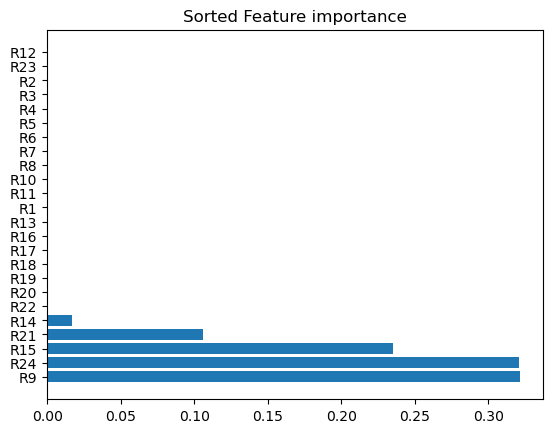

In [16]:
i_sorted = np.argsort(-imp_features)
n_sorted = x.columns[i_sorted]
imp_sort = imp_features[i_sorted]
plt.barh(n_sorted, imp_sort)
plt.title("Sorted Feature importance")
plt.show()

## XGboost

In [19]:
xgb = XGBClassifier(random_state = 2022)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_pred_prob = xgb.predict_proba(x_test)[:,1]
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

0.85
0.835


In [20]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
params = {"n_estimators":[50,100,150],
          "max_depth":[1,2,3,4],
          "learning_rate":[0.01,0.15,0.2,0.3]}
gcv = GridSearchCV(xgb, param_grid = params, verbose = 3, scoring = "roc_auc", cv = kfold)
gcv.fit(x, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.819 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.879 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.825 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.976 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=50;, score=0.938 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.868 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.926 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.864 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.994 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=100;, score=0.959 to

[CV 5/5] END learning_rate=0.15, max_depth=2, n_estimators=150;, score=0.959 total time=   0.0s
[CV 1/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.890 total time=   0.0s
[CV 2/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.885 total time=   0.0s
[CV 3/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.834 total time=   0.0s
[CV 4/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.982 total time=   0.0s
[CV 5/5] END learning_rate=0.15, max_depth=3, n_estimators=50;, score=0.953 total time=   0.0s
[CV 1/5] END learning_rate=0.15, max_depth=3, n_estimators=100;, score=0.890 total time=   0.0s
[CV 2/5] END learning_rate=0.15, max_depth=3, n_estimators=100;, score=0.901 total time=   0.0s
[CV 3/5] END learning_rate=0.15, max_depth=3, n_estimators=100;, score=0.858 total time=   0.0s
[CV 4/5] END learning_rate=0.15, max_depth=3, n_estimators=100;, score=0.982 total time=   0.0s
[CV 5/5] END learning_rate=0.15, max_depth=3,

[CV 4/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.976 total time=   0.0s
[CV 5/5] END learning_rate=0.2, max_depth=4, n_estimators=150;, score=0.970 total time=   0.0s
[CV 1/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.876 total time=   0.0s
[CV 2/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.901 total time=   0.0s
[CV 3/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.852 total time=   0.0s
[CV 4/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.988 total time=   0.0s
[CV 5/5] END learning_rate=0.3, max_depth=1, n_estimators=50;, score=0.964 total time=   0.0s
[CV 1/5] END learning_rate=0.3, max_depth=1, n_estimators=100;, score=0.857 total time=   0.0s
[CV 2/5] END learning_rate=0.3, max_depth=1, n_estimators=100;, score=0.896 total time=   0.0s
[CV 3/5] END learning_rate=0.3, max_depth=1, n_estimators=100;, score=0.846 total time=   0.0s
[CV 4/5] END learning_rate=0.3, max_depth=1, n_estimato

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=...
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=2022, ...),
             param_grid={'learning_rate': [0.01, 0.15, 0.2, 0.3],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=3)

In [21]:
print(gcv.best_params_)
print(gcv.best_score_)

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 150}
0.9296280642434489
